### Señal exponencial compleja

La señal exponencial compleja está definifa por la [función exponencial compleja](https://en.wikipedia.org/wiki/Exponential_function#Complex_plane)

\begin{equation}
x(t) = e^{s t} 
\end{equation}

donde $s = \sigma + j \Omega$ denota la frecuencia compleja con $\sigma, \Omega \in \mathbb{R}$. La señal es usada a menudo como una representación general de señales. Usando [la fórmula de Euler](https://en.wikipedia.org/wiki/Euler's_formula), la función se puede reformular como

\begin{equation}
x(t) = e^{(\sigma + j \Omega) t} = e^{\sigma t} \cos(\Omega t) + j e^{\sigma t} \sin(\Omega t)
\end{equation}

La parte real/imaginaria de la señal exponencial está dada por un coseno/seno con frecuencia angular $\Omega = 2 \pi F$. Para $t>0$, el peso dependiente del tiempo $e^{\sigma t}$ es

* exponencialmente decreciente con el tiempo para $\sigma < 0$,
* constantemente uno para $\sigma = 0$,
* exponencialmente creciente con el tiempo para $\sigma > 0$,

Además, la señal exponencial compleja es usada para modelar señales armónicas con amplitud exponencialmente decreciente o creciente.

Ahora bien, una señal exponencial compleja discreta puede expresarse como:

$$
x(n) = e^{sn}
$$

con $s = \sigma + j \omega$.

$$
x(n) = e^{\sigma n} \cdot e^{j \omega n}
$$

Donde $\omega$ debe ser una freciencia discteta y $e^{j \omega n}$ puede ser rescrito como $e^{j \omega n} = Cos(\omega n) + j~Sen(\omega n)$. Por lo tanto, existirá

$$
x(n)_{Real} = e^{\sigma n} Cos(\omega n)\\
x(n)_{Imag} = e^{\sigma n} Sen(\omega n)
$$

In [42]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

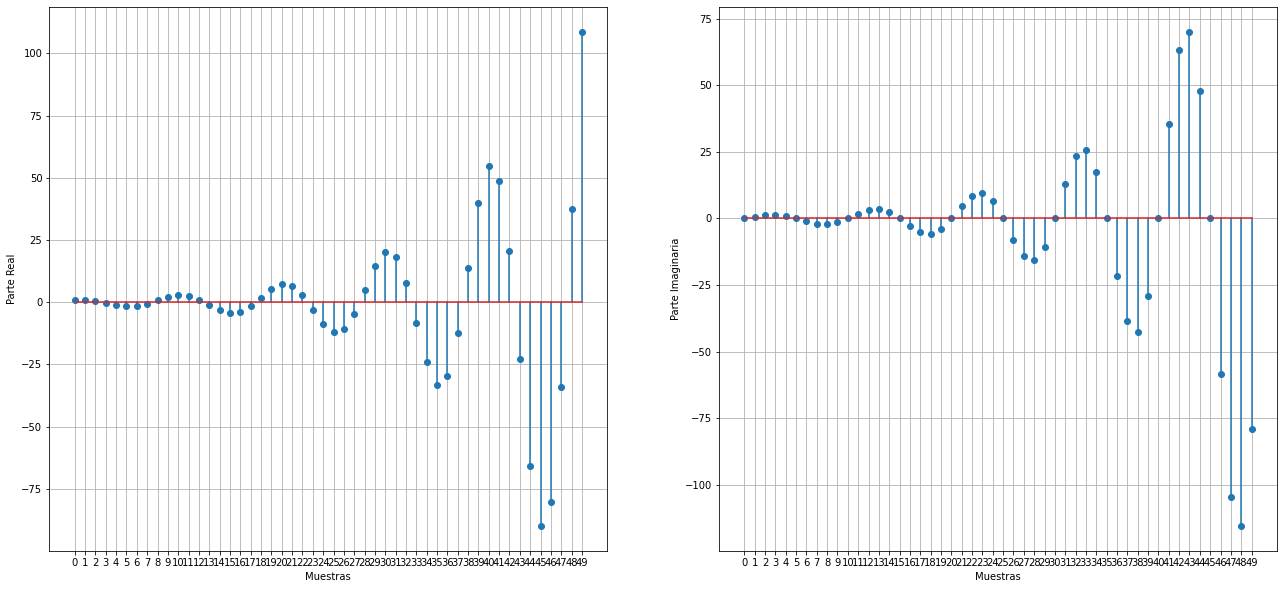

In [43]:
n = np.arange(0, 50)
x = np.exp((0.1 + .1j * 2 * np.pi) * n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
ax1.stem(n, np.real(x))
ax1.grid()
ax1.set_xticks(n)
ax1.set_xlabel('Muestras')
ax1.set_ylabel('Parte Real')
ax2.stem(n, np.imag(x))
ax2.grid()
ax2.set_xticks(n)
ax2.set_xlabel('Muestras')
ax2.set_ylabel('Parte Imaginaria')
fig.show()

**Ejemplo**

El ejemplo ilustra la señal exponencial compleja y sus parámetros. El módulo de Python [SymPy](http://docs.sympy.org/latest/index.html) es usado para este propósito. Este proporciona funcionalidad para las variables y funciones simbólicas, así como su cálculo. Las variables simbólicas requeridas deben definirse explícitamente antes de su uso. En este ejemplo, $t$, $\omega$ y $\sigma$ son definidos como variables simbólicas reales, seguido por la definición de la propia señal exponencial.

In [44]:
from sympy import *
init_printing() #se inicializa para mostrar en pantalla

t, sigma, Omega = symbols('t sigma Omega', real=True)
x = Function('x')(t)
s = sigma + I*Omega
sig = exp(s*t)
Eq(x, sig)

Ahora tomando valores específicos para la frecuencia compleja $s = \sigma + j \Omega$ con fines ilustrativos, una nueva señal es definida mediante la sustitución de $\sigma$ y $\Omega$. La parte real e imaginaria de la señal es graficada.

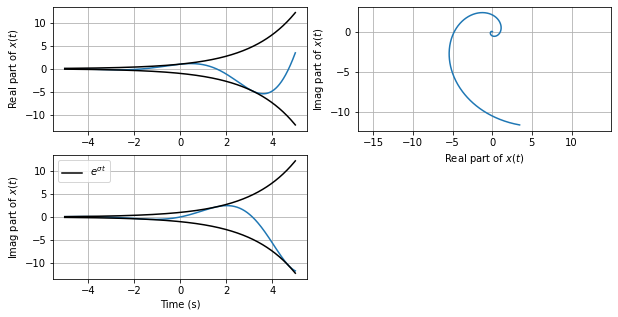

In [52]:
t = np.linspace(-5,5,1000)
Omega = 1
sigma = 0.5

x = np.exp(t*(sigma+1j*Omega))

plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.plot(t,np.real(x))
plt.plot(t,np.exp(t*(sigma)),'k',label='$e^{\sigma t}$')
plt.plot(t,-np.exp(t*(sigma)),'k')
plt.ylabel('Real part of $x(t)$')
plt.grid()

plt.subplot(2,2,3)
plt.plot(t,np.imag(x))
plt.plot(t,np.exp(t*(sigma)),'k',label='$e^{\sigma t}$')
plt.plot(t,-np.exp(t*(sigma)),'k')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Imag part of $x(t)$')
plt.grid()


plt.subplot(2,2,2)
plt.plot(np.real(x),np.imag(x))
plt.xlabel('Real part of $x(t)$')
plt.ylabel('Imag part of $x(t)$')
plt.grid()
plt.axis('equal')
plt.show()



**Ejercicio**

* Pruebe otros valores `omega` y `sigma` para crear señales con amplitud creciente/decreciente/constante y diferentes frecuencias angulares. 
 

*   Utilizando utilizando el módulo de python [SymPy](http://docs.sympy.org/latest/index.html), mejore el algoritmo para dibujar el correspondiente diagrama de polos y ceros.



# Exponenciales complejas armónicamente relacionadas

A continuación se grafican los armónicos de la frecuencia discreta $\frac{1}{N}$

In [46]:
from ipywidgets import interactive

def myfun(k=1):
  N = 12
  n = np.arange(2*N)
  x = np.exp(1j*2*np.pi*k/N*n)

  plt.figure(figsize=(18,5))
  plt.subplot(1,3,1)
  plt.stem(n,np.real(x))
  plt.title('Real')
  plt.grid()
  plt.xticks(n)
  plt.ylim([-1.1,1.1])

  plt.subplot(1,3,2)
  plt.stem(n,np.imag(x))
  plt.title('Imag')
  plt.grid()
  plt.xticks(n)
  plt.ylim([-1.1,1.1])

  plt.subplot(1,3,3,polar=True)
  plt.stem(np.angle(x),np.abs(x))
  plt.title('%d'%k+'/%d'%N)

  plt.show()

interactive_plot = interactive(myfun, k=(-30,30,1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=1, description='k', max=30, min=-30), Output(layout=Layout(height='350px…

**Copyright**

The notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Signals and Systems* by Sascha Spors.